---
## Sorbonne Université
# <center> Mathématiques discrètes </center>
## <center> LU2IN005 </center>
## <div style="text-align:right;"> Année 2025-2026</div>
---

---
# <center> TME programmation d'automates finis </center>

L'objectif de ce TME est de programmer en python quelques uns des
algorithmes pour les automates finis vus en cours et en TD, en
utilisant des structures de données fournies dans le code mis à votre
disposition.
---
# Consignes

Copiez dans votre répertoire de travail les fichiers présents dans le Dossier 
*Fichiers Python fournis* de la page Moodle de l'UE.

Ils contiennent les définitions de structures de données décrites
ci-dessous, ainsi que des aide-mémoire sur l'utilisation de python.

**Le seul fichier que vous êtes autorisés à modifier** est 
`Projet_etudiant.ipynb`, partiellement prérempli. 
Les instructions `return` sont à supprimer lorsque
vous remplirez le contenu des différentes fonctions.  Les autres
fichiers n'ont pas besoin d'être lus (mais ils peuvent l'être).

---

### Table des matières

> [1. Présentation](#sec1)
>> [1.1 La classe `State`](#sec1_1) <br>
>> [1.2 La classe `Transition`](#sec1_2) <br>
>> [1.3 La classe `Automate`](#sec1_3)

> [2. Prise en mains](#sec2)
>> [2.1 Création d'automates](#sec2_1) <br>
>> [2.2 Premières manipulations](#sec2_2) <br>

> [3. Exercices de base : tests et complétion](#sec3)

> [4. Déterminisation](#sec4)

> [5. Constructions sur les automates réalisant des opérations sur les langages acceptés](#sec5)
>> [5.1 Opérations ensemblistes sur les langages](#sec5_1) <br>
>> [5.2 Opérations rationnelles sur les langages](#sec5_2)

> [6. Application](#sec6)

In [1]:
## Import des bibliothèques nécessaires au projet.
## Ne pas modifier les fichiers "bibliothèque".

## Interpréter cette cellule avant de continuer.

from transition import *
from state import *
import os
import copy
from automateBase import AutomateBase
import itertools

class Automate(AutomateBase):
    pass

### 1. Présentation  <a class="anchor" id="sec1"></a>

Le projet utilise le langage python avec une syntaxe légèrement
différente de celle vue en **LU1IN001 / 011**, parce qu'il exploite en particulier
la notion de classes d'objets. Une introduction à cette notion est présentée dans le livre associé
au cours : cf [Chapitre 13](https://www-licence.ufr-info-p6.jussieu.fr/lmd/licence/2021/ue/LU1IN001-2021oct/cours2020.pdf).

De plus, le typage des variables est noté de façon légèrement différente, en commentaires, pour les déclarations
comme pour les arguments des fonctions. Pour ces derniers, les types sont indiqués dans la première ligne de la documentation de la fonction.

Les particularités sont brièvement expliquées en annexe
de ce document. Par ailleurs, vous trouverez dans la section
`projet` de la page Moodle un mémo sur la syntaxe python, ainsi que la carte de
référence du langage utilisée en **LU1IN001 / 011**.  On rappelle qu'une ligne
commençant par `#` est un commentaire, ignoré par
l'interpréteur.

Toutes les structures de données nécessaires à la construction des
automates sont fournies sous la forme de classes python, pour les
transitions d'un automate, ses états, et les automates
eux-mêmes. Cette section indique comment les utiliser.

#### 1.1 La classe `State` <a class="anchor" id="sec1_1"></a>

Un état est représenté par
- un entier `id` (type `int`) qui définit son identifiant,
- un booléen `init` (type `bool`) indiquant si c'est un état initial,
- un booléen `fin` (type `bool`) indiquant si c'est un état final,
- une chaîne de caractères `label` (type `str`) qui définit son étiquette, permettant de le *décorer*. Par défaut, cette variable est la version chaîne de caractères de l'identifiant de l'état. 

On définit l'alias de type `State` pour représenter les variables de ce type. 

Ainsi, l'instruction ci-dessous crée une variable `s` représentant un état d'identifiant `1`, qui est un état initial mais pas final, dont l'identifiant et l'étiquette  `1` :

In [2]:
# s : State
s = State(1, True, False)

Si l'on souhaite avoir une étiquette différente de l'identifiant, on
utilise un quatrième argument :

In [3]:
s = State(1, True, False, 'etat 1') 

On accède ensuite aux différents champs de `s` par la notation pointée : exécutez les cellules suivantes pour observer l'affichage obtenu.

In [4]:
print('La valeur de s.id est : ')
print(s.id)

La valeur de s.id est : 
1


In [5]:
print('La valeur de s.init est : ')
print(s.init)

La valeur de s.init est : 
True


In [6]:
print('La valeur de s.fin est : ')
print(s.fin)

La valeur de s.fin est : 
False


In [7]:
print('La valeur de s.label est : ')
print(s.label)

La valeur de s.label est : 
etat 1


In [8]:
print("L'affichage de s est : ")
print(s)

L'affichage de s est : 
etat 1(init)


Ainsi, une variable de type `State` est affichée par son étiquette et, entre parenthèses, si c'est un état initial et/ou final.

#### 1.2 La classe `Transition` <a class="anchor" id="sec1_2"></a>

Une transition est représentée par 
- un état `stateSrc` (type `State`) correspondant à son état de départ
- un caractère `etiquette` (type `str`) donnant son   étiquette
- un état `stateDest` (type `State`) correspondant à son état de destination

On définit l'alias de type `Transition` pour représenter les variables de ce type.

La séquence d'instructions suivante crée la transition d'étiquette `"a"` de l'état `s` (défini ci-dessus) vers lui-même et affiche les différents champs de la transition :

In [9]:
# t : Transition
t = Transition(s, "a", s)

In [10]:
print('La valeur de t.etiquette est : ')
print(t.etiquette)

La valeur de t.etiquette est : 
a


In [11]:
print("L'affichage de t.stateSrc est : ")
print(t.stateSrc)

L'affichage de t.stateSrc est : 
etat 1(init)


On remarque que la variable `stateSrc` est de type `State`, on obtient donc un état, et non uniquement un
identifiant d'état. 

In [12]:
print("L'affichage de t.stateDest est : ")
print(t.stateDest)

L'affichage de t.stateDest est : 
etat 1(init)


In [13]:
print("L'affichage de t est : ")
print(t)

L'affichage de t est : 
[etat 1(init)-a->etat 1(init)]


#### 1.3 La classe `Automate` <a class="anchor" id="sec1_3"></a>

Un automate est représenté par
- l'ensemble de ses transitions `allTransitions` (de type `set[Transition]`) 
- l'ensemble de ses états `allStates` (de type `set[State]`)
- une étiquette `label` (de type `str`) qui est éventuellement vide.

On définit l'alias de type `Automate` pour représenter les variables de ce type.

Ainsi, de même que pour les classes précédentes, l'accès aux
différents champs se fait par la notation pointée. Par exemple, on
obtient l'ensemble des états d'un automate `monAutomate` par
l'instruction `monAutomate.allStates`.

Pour créer un automate, il existe trois possibilités.

**Création à partir d'un ensemble de transitions.**<br>
On peut d'abord utiliser le constructeur de signature `Automate : set[Transition] -> Automate`.<br>
Il déduit alors l'ensemble des états à partir de l'ensemble des transitions et définit par défaut l'étiquette
de l'automate comme la chaîne de caractères vide.

Par exemple, en commençant par créer les états et les transitions nécessaires :

In [14]:
## création d'états
# s1 : State
s1 = State(1, True, False)
# s2 : State
s2 = State(2, False, True)

## création de transitions
# t1 : Transition
t1 = Transition(s1,"a",s1)
# t2 : Transition
t2 = Transition(s1,"a",s2)
# t3 : Transition
t3 = Transition(s1,"b",s2)
# t4 : Transition
t4 = Transition(s2,"a",s2)
# t5 : Transition
t5 = Transition(s2,"b",s2)
# set_transitions : set[Transition]
set_transitions = {t1, t2, t3, t4, t5}

## création de l'automate
# aut : Automate
aut = Automate(set_transitions)

L'affichage de cet automate, par la commande `print(aut)` produit alors le résultat suivant : 

In [15]:
print(aut)

Etats :
  1(init)
  2(fin)
Transitions :
  [2(fin)-a->2(fin)]
  [2(fin)-b->2(fin)]
  [1(init)-b->2(fin)]
  [1(init)-a->2(fin)]
  [1(init)-a->1(init)]



Les états de l'automate sont déduits de l'ensemble de transitions.

Optionnellement, on peut donner un nom à l'automate, en utilisant la variable `label`, par exemple :

In [16]:
# aut2 : Automate
aut2 = Automate(set_transitions, label="A") 

print(aut2)

Automate A
Etats :
  1(init)
  2(fin)
Transitions :
  [2(fin)-a->2(fin)]
  [2(fin)-b->2(fin)]
  [1(init)-b->2(fin)]
  [1(init)-a->2(fin)]
  [1(init)-a->1(init)]



**Création à partir d'un ensemble de transitions et d'un ensemble d'états.**<br>
Dans le second cas, on crée un automate à partir d'un ensemble de
transitions mais aussi d'un ensemble d'états, par exemple pour représenter des
automates contenant des états isolés. Pour cela, on utilise le
constructeur `Automate : set[Transition] x set[State] -> Automate`.

On peut également, optionnellement, donner un nom à l'automate :

In [17]:
# set_etats : set[State]
set_etats = {s1, s2}

# aut3 : Automate
aut3 = Automate(set_transitions, set_etats, "B")

print(aut3)

Automate B
Etats :
  1(init)
  2(fin)
Transitions :
  [2(fin)-a->2(fin)]
  [2(fin)-b->2(fin)]
  [1(init)-b->2(fin)]
  [1(init)-a->2(fin)]
  [1(init)-a->1(init)]



L'ordre des paramètres peut ne pas être respecté **à la condition** que l'on donne leur nom explicitement. Ainsi, la ligne suivante est correcte :

In [18]:
aut = Automate(setStates = set_etats, label = "A", setTransitions = set_transitions)

print(aut)

Automate A
Etats :
  1(init)
  2(fin)
Transitions :
  [2(fin)-a->2(fin)]
  [2(fin)-b->2(fin)]
  [1(init)-b->2(fin)]
  [1(init)-a->2(fin)]
  [1(init)-a->1(init)]



**Création à partir d'un fichier contenant sa description.**<br>
La fonction `Automate.creationAutomate : str -> Automate` prend en argument un nom de fichier qui décrit un automate et construit l'automate correspondant (voir exemple ci-dessous).

La description textuelle de l'automate doit suivre le format suivant (voir exemple ci-dessous) :
- #E: suivi de la liste des noms des états, séparés par
  des espaces ou des passages à la ligne. Les noms d'états peuvent
  être n'importe quelle chaîne alphanumérique pouvant également
  contenir le symbole `_`. Par contre, si le nom d'état
  contient des symboles *non numériques* il ne doit pas commencer
  par un chiffre, sous peine de provoquer une erreur à l'affichage.
  Ainsi, `10` et `A1` sont des noms d'états possibles,
  mais `1A` ne l'est pas.
- #I: suivi de la liste des états initiaux
  séparés par des espaces ou des passages à la ligne, 
- #F: suivi de la liste des
  états finaux séparés par des espaces ou des passages à la ligne, 
- #T: suivi de la liste des transitions séparées par des
  espaces ou des passages à la ligne. Chaque transition est donnée
  sous le format `(etat1, lettre, etat2)`.

Par exemple le fichier `exempleAutomate.txt` contenant <br>
`#E: 0 1 2 3`<br>
`#I: 0`<br>
`#F: 3`<br>
`#T: (0 a 0)`<br>
`	(0 b 0)`<br>
`	(0 a 1)`<br>
`	(1 a 2)`<br>
`	(2 a 3)`<br>
`	(3 a 3)`<br>
`	(3 b 3)`<br>
est formaté correctement. L'appel suivant produira l'affichage...

In [19]:
# automate : Automate
automate = Automate.creationAutomate("ExemplesAutomates/exempleAutomate.txt")
print(automate)

Etats :
  0(init)
  1
  2
  3(fin)
Transitions :
  [3(fin)-b->3(fin)]
  [3(fin)-a->3(fin)]
  [0(init)-b->0(init)]
  [0(init)-a->0(init)]
  [1-a->2]
  [2-a->3(fin)]
  [0(init)-a->1]



**Fonctions de manipulation des automates.**<br>
La classe automate contient également de nombreuses fonctions utiles. Elles
s'appliquent à un objet de type `Automate` et s'utilisent donc sous la forme
`aut.<`*fonction*`>(<`*parametres*`>)` où `aut` est une variable de type `Automate`.


- `show : float -> NoneType` <br> 
    prend en argument facultatif un flottant (facteur de grossissement, par défaut il vaut 1.0) et produit une représentation graphique de l'automate.<br>
    Ainsi, en utilisant l'automate défini dans le fichier d'exemple précédent, l'instruction `automate.show(1.2)` produit l'image suivante :

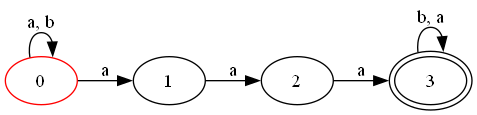

In [20]:
automate.show(1.2)

- `addTransition : Transition -> bool`<br>
  prend en argument une transition `t`, fait la mise à jour de
  l'automate en lui ajoutant `t` et ajoute les états impliqués
  dans l'automate s'ils en sont absents. Elle rend `True` si l'ajout a
  eu lieu, `False` sinon (si `t` était déjà présente dans l'automate).
  
- `removeTransition : Transition -> bool`<br>
  prend en argument une transition `t` et fait la mise à jour de
  l'automate en lui enlevant la transition, sans modifier les
  états. Elle rend `True` si la suppression a eu lieu, `False` sinon (si
  `t` était absente de l'automate).

- `addState : State -> bool`<br>
  prend en argument un état `s` et fait la mise à jour de
  l'automate en lui ajoutant `s`.  Elle rend `True` si l'ajout a eu
  lieu, `False` sinon (si `s` était déjà présent dans l'automate).

- `nextId : -> int`<br>
  renvoie un entier id frais, en choisissant l'entier le plus petit,
  strictement supérieur à tous les id des états de l'automate.

- `removeState : State -> bool`<br>
  prend en argument un état `s` et fait la mise à jour de
  l'automate en supprimant `s` ainsi que toutes ses transitions
  entrantes et sortantes.  Elle rend `True` si l'ajout a eu lieu, `False`
  sinon (si `s` était absent de l'automate).
  
- `getSetInitialStates :  -> set[State]`<br> 
  rend l'ensemble des états initiaux.

- `getSetFinalStates :  -> set[State]`<br>
  rend l'ensemble des états finaux.

- `getSetTransitionsFrom : State -> set[Transition]`<br>
  rend l'ensemble des transitions sortant de l'état passé en argument.

- `prefixStates : int -> NoneType`<br>
  modifie les identifiants et les étiquettes de tous les états de
  l'automate en les préfixant par l'entier passé en argument.

- `succElem : State x str -> set[State]`<br>
  étant donné un état `s` et un caractère `a`, elle rend l'ensemble des
  états successeurs de `s` par le caractère `a`.  Formellement,
  
  $$succElem(s, a) = \{s' \in S \mid  s \xrightarrow{a} s'\}.$$
  
  Cet ensemble peut contenir plusieurs états si l'automate n'est pas déterministe.

In [21]:
# Voilà le code de succElem

def succElem(self, state, lettre):
    """ State x str -> set[State]
        rend l'ensemble des états accessibles à partir d'un état state par l'étiquette lettre
    """
    successeurs = set()
    # t: Transitions
    for t in self.getSetTransitionsFrom(state):
        if t.etiquette == lettre:
            successeurs.add(t.stateDest)
    return successeurs

Automate.succElem = succElem

Avec l'exemple précédent, on obtient :

In [22]:
s0 = list(automate.getSetInitialStates())[0] ## on récupère l'état initial de automate
automate.succElem(s0, 'a')

{0(init), 1}

### 2. Prise en mains  <a class="anchor" id="sec2"></a>

#### 2.1 Création d'automates <a class="anchor" id="sec2_1"></a>

Soit l'automate $\mathcal{A}$ défini sur l'alphabet $\{ a,b \}$, d'états $0,1,2$, 
d'état initial 0, d'état final 2 et de transitions : <br>$(0,a,0)$, $(0,b,1)$, 
$(1,a,2)$, $(1,b,2)$, $(2,a,0)$ et $(2,b,1)$.

1. Créer l'automate $\mathcal{A}$ à l'aide de son ensemble de transitions. Pour cela, créer un état `s0`  
d'identifiant $0$
  qui soit initial, un état `s1` d'identifiant $1$ et un état
  `s2` d'identifiant $2$ qui soit final. Puis créer `t1`, `t2`, `t3`, `t4`, `t5` et
  `t6` les 6 transitions de l'automate. Créer enfin l'automate
  `auto` à partir de ses transitions, par exemple avec l'appel<br>
  `auto = Automate({t1,t2,t3,t4,t5,t6})`.<br>
  Vérifier que l'automate correspond bien à $\mathcal{A}$ en l'affichant.

In [23]:
# A faire par l'étudiant
s0 = State(0, True, False)
s1 = State(1, False, False)
s2 = State(2, False, True)
t1 = Transition(s0, "a", s0)
t2 = Transition(s0, "b", s1)
t3 = Transition(s1, "a", s2)
t4 = Transition(s1, "b", s2)
t5 = Transition(s2, "a", s0)
t6 = Transition(s2, "b", s1)

auto = Automate({t1,t2,t3,t4,t5,t6})

print(auto)

Etats :
  0(init)
  1
  2(fin)
Transitions :
  [2(fin)-b->1]
  [0(init)-b->1]
  [1-b->2(fin)]
  [1-a->2(fin)]
  [2(fin)-a->0(init)]
  [0(init)-a->0(init)]



2. Créer l'automate $\mathcal{A}$ à l'aide de sa liste de
  transitions et d'états, par exemple à l'aide de l'appel<br>
  `auto1 = Automate({t1,t2,t3,t4,t5,t6}, {s0,s1,s2})`<br>
  puis afficher l'automate obtenu à l'aide de `print` puis à l'aide de `show`.
  Vérifier que l'automate `auto1` est bien
  identique à l'automate `auto`.

Etats :
  0(init)
  1
  2(fin)
Transitions :
  [2(fin)-b->1]
  [0(init)-b->1]
  [1-b->2(fin)]
  [1-a->2(fin)]
  [2(fin)-a->0(init)]
  [0(init)-a->0(init)]



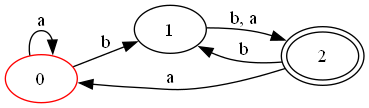

In [24]:
# A faire par l'étudiant
auto1 = Automate({t1,t2,t3,t4,t5,t6}, {s0,s1,s2})
print(auto1)
auto1.show(1.2)

3. Créer l'automate $\mathcal{A}$ à partir d'un fichier. Pour cela,
  créer un fichier `auto2.txt`, dans lequel sont indiqués les
  listes des états et des transitions, ainsi que l'état initial et
  l'état final, en respectant la syntaxe donnée dans la section
  précédente. Par exemple la liste d'états est décrite par la ligne
  `#E: 0 1 2`.  Utiliser ensuite par exemple l'appel
  `auto2 = Automate.creationAutomate("ExemplesAutomates/auto2.txt")`, puis afficher
  l'automate `auto2` à l'aide de `print` ainsi qu'à l'aide de `show`.

Etats :
  0(init)
  1
  2(fin)
Transitions :
  [2(fin)-b->1]
  [0(init)-b->1]
  [1-b->2(fin)]
  [1-a->2(fin)]
  [2(fin)-a->0(init)]
  [0(init)-a->0(init)]



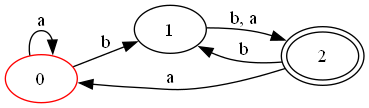

In [25]:
# A faire par l'étudiant
auto2 = Automate.creationAutomate("auto2.txt")
print(auto2)
auto2.show(1.2)

#### 2.2 Premières manipulations <a class="anchor" id="sec2_2"></a>

1. Appeler la fonction `removeTransition` sur l'automate
  `auto` en lui donnant en argument la transition $(0,a,1)$. Il
  s'agit donc de créer une variable `t` de type
  `Transition` représentant $(0,a,1)$ et d'effectuer l'appel
  `auto.removeTransition(t)`. Observer le résultat sur un
  affichage.  Appeler ensuite cette fonction sur `auto` en lui
  donnant en argument la transition `t1`. Observer le résultat
  sur un affichage. Appeler la fonction `addTransition` sur
  l'automate `auto` en lui donnant en argument la transition
  `t1`. Vérifier que l'automate obtenu est bien le même
  qu'initialement.

In [26]:
# A faire par l'étudiant
t = Transition(s0, "a", s1)
auto.removeTransition(t) #N'existe pas dans auto donc renvoie False
auto.removeTransition(t1)

True

In [27]:
# A faire par l'étudiant
auto.addTransition(t1)
print(auto)

Etats :
  0(init)
  1
  2(fin)
Transitions :
  [2(fin)-b->1]
  [0(init)-b->1]
  [1-b->2(fin)]
  [1-a->2(fin)]
  [2(fin)-a->0(init)]
  [0(init)-a->0(init)]



2. Appeler la fonction `removeState` sur l'automate
  `auto` en lui donnant en argument l'état
  `s1`. Observer le résultat. Appeler la fonction
  `addState` sur l'automate `auto` en lui donnant en
  argument l'état `s1`. Créer un état `s0bis` d'identifiant
  $0$ et initial. Appeler la fonction `addState` sur
  `auto` avec `s0bis` comme argument. Observer le résultat.

In [28]:
# A faire par l'étudiant
#auto.removeState(s1) #Renvoie True
#auto.addState(s1)
s0bis = State(0, True, False)
auto.addState(s0bis) #Renvoie False car s0bis déjà dans auto

False

3. Appeler la fonction `getSetTransitionsFrom` sur
  l'automate `auto1` avec `s1` comme argument. Afficher
  le résultat.

In [29]:
# A faire par l'étudiant
auto1.getSetTransitionsFrom(s1) #2 transitions avec 1 en état de base

{[1-a->2(fin)], [1-b->2(fin)]}

### 3. Exercices de base : tests et complétion  <a class="anchor" id="sec3"></a>

1. Donner une définition de la fonction `succ`
  qui, étant donné un ensemble d'états $S$ et une chaîne de caractères
      $a$ (de longueur 1), renvoie l'ensemble des états successeurs de tous les états de $L$ par le caractère $a$. Cette fonction doit généraliser la fonction `succElem` pour qu'elle prenne en paramètre un ensemble d'états au lieu d'un seul état.  Formellement, si $S$ est un ensemble d'états et $a$ une lettre,
  $$succ(S,a) = \bigcup_{s \in S}succ(s,a) = \{s' \in S \mid \text{il existe } s \in L \text{ tel que } s \xrightarrow{a} s'\}.$$

In [30]:
# A faire par l'étudiant

def succ(self, setStates, lettre):
    """ Automate x set[State] x str -> set[State]
        rend l'ensemble des états accessibles à partir de l'ensemble d'états setStates par l'étiquette lettre
    """
    successeurs = set()
    # t: Transitions
    for state in setStates:
        for t in self.getSetTransitionsFrom(state):
            if t.etiquette == lettre:
                successeurs.add(t.stateDest)
    return successeurs

Automate.succ = succ

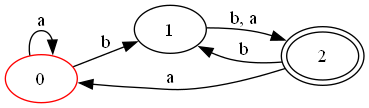

---
{[1-b->2(fin)], [1-a->2(fin)]}


In [31]:
# On a défini auparavant un automate auto1, voilà les résultats le concernant, puis un jeu de tests :

auto1.show()
print('---')
a = auto1.getSetTransitionsFrom(s1)
print(a)
assert auto1.succ({s0, s2}, 'b') == {s1}
assert auto1.succ({s0}, 'a') == {s0}
assert auto1.succ({s2, s1}, 'a') == {s0, s2}

In [32]:
# Fournir un autre jeu de tests
assert auto1.succ({s0, s2}, 'a') == {s0}
assert auto1.succ({s1}, 'a') == {s2}
assert auto1.succ({s2}, 'b') == {s1}

2. Donner une définition de la fonction `accepte`
  qui, étant donné une chaîne de caractères `mot`,
  renvoie un booléen qui vaut vrai si et seulement si `mot` est accepté par l'automate. Attention, noter que l'automate peut ne pas être déterministe.

In [33]:
# A faire par l'étudiant

def accepte(self, mot) :
    """ Automate x str -> bool
        rend True si auto accepte mot, False sinon
    """
    courant = self.getSetInitialStates()
    for lettre in mot:
        courant = self.succ(courant, lettre)
        if not courant:
            return False
    return bool(courant & self.getSetFinalStates())

Automate.accepte = accepte

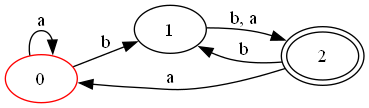

---


In [34]:
# On a défini auparavant un automate auto1, voilà les résultats le concernant, puis un jeu de tests :

auto1.show()
print('---')
assert auto1.accepte('aa') == False
assert auto1.accepte('ab') == False
assert auto1.accepte('aba') == True


In [35]:
# Fournir un autre jeu de tests
print('---')
assert auto1.accepte('aabbb') == False
assert auto1.accepte('abaaaaabbaba') == True
assert auto1.accepte('aabababa') == True
print('---')

---
---


3. Donner une définition de la fonction `estComplet`
    qui, étant donné un automate `auto` et un ensemble de caractères `Alphabet`
    renvoie un booléen qui vaut vrai si et
    seulement si `auto` est complet par rapport à l'alphabet.
    
    On n'effectuera pas la vérification sur les états non accessibles.

In [36]:
# A faire par l'étudiant

### On ne prend pas en compte les états non accessibles


def estComplet(self, Alphabet) :
    """ Automate x set[str] -> bool
        rend True si auto est complet pour les lettres de Alphabet, False sinon
        hyp : les éléments de Alphabet sont de longueur 1
    """
    accessibles = set(self.getSetInitialStates())
    pile = list(accessibles)
    while pile:     #Calcul des états accessibles
        s = pile.pop()
        for t in self.getSetTransitionsFrom(s):
            if t.stateDest not in accessibles:
                accessibles.add(t.stateDest)
                pile.append(t.stateDest)
    for s in accessibles:     #On vérifie la complétude
        for a in Alphabet:
            if not self.succElem(s, a):
                return False
    return True

Automate.estComplet = estComplet

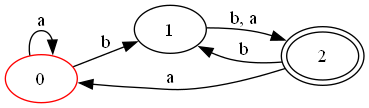

---


In [37]:
# On a défini auparavant un automate auto1, voilà les résultats le concernant, puis un jeu de tests :

auto1.show()
print('---')
assert auto1.estComplet({'a', 'b'}) == True
assert auto1.estComplet({'a', 'c', 'b'}) == False

In [38]:
# Fournir un autre jeu de tests
assert auto1.estComplet({'b', 'a'}) == True
assert auto1.estComplet({'b', 'a', 'c'}) == False

4. Donner une définition de la fonction `estDeterministe`
qui, étant donné un automate `auto`,
 renvoie un booléen qui vaut vrai si et seulement si `auto` est déterministe.

In [39]:
# A faire par l'étudiant

def estDeterministe(self) :
    """ Automate -> bool
        rend True si auto est déterministe, False sinon
    """
    init_states = self.getSetInitialStates()
    if len(init_states) != 1: #On vérifie qu'il n'y a qu'un seul état initial
        return False
    for s in self.allStates:
        transitions_a_partir_de_s = self.getSetTransitionsFrom(s)
        labels_traverse = set()
        for t in transitions_a_partir_de_s:
            if t.etiquette in labels_traverse:
                return False  #Cas avec deux transitions sur la même étiquette
            labels_traverse.add(t.etiquette)
    return True
    
Automate.estDeterministe = estDeterministe

L'appel de fonction `copy.deepcopy(auto)` renvoie un nouvel automate identique à `auto`.

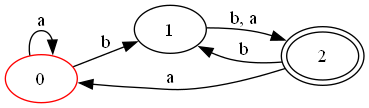

---


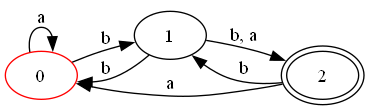

---


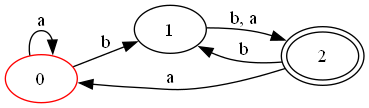

---


In [40]:
# On a défini auparavant un automate auto1, voilà les résultats le concernant, puis un jeu de tests :

auto1.show()
print('---')
assert auto1.estDeterministe() == True

auto1bis = copy.deepcopy(auto1)
#t : Transition
t = Transition(s1, 'b', s0)
auto1bis.addTransition(t)
auto1bis.show()
print('---')
assert auto1bis.estDeterministe() == False

auto1bis.removeTransition(t)
auto1bis.show()
print('---')
assert auto1bis.estDeterministe() == True

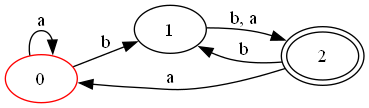

---


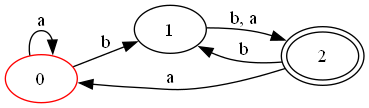

---


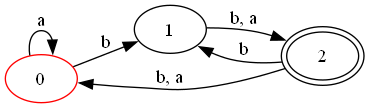

---


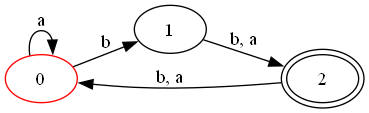

---


In [41]:
# Fournir un autre jeu de tests
auto1.show()
print('---')
assert auto1.estDeterministe() == True

auto1ter = copy.deepcopy(auto1)
#t : Transition
t = Transition(s2, 'b', s1)
auto1bis.addTransition(t)
auto1bis.show()
print('---')
assert auto1bis.estDeterministe() == True #Car (s2, 'b', s1) existe déjà comme transition
t1 = Transition(s2, 'b', s0)
auto1bis.addTransition(t1)
auto1bis.show()
print('---')
assert auto1bis.estDeterministe() == False 
auto1bis.removeTransition(t)
auto1bis.show()
print('---')
assert auto1bis.estDeterministe() == True

5. Donner une définition de la fonction `completeAutomate`
qui, étant donné un automate `auto` et l'ensemble alphabet d'entrée `Alphabet`,
renvoie l'automate complété d'`auto`.
  
Attention, il ne faut pas modifier `auto`, mais construire un nouvel automate.
<br>Il pourra être intéressant d'utiliser l'appel de fonction
`copy.deepcopy(auto)` qui renvoie un nouvel automate identique à `auto`.
<br>On pourra faire appel à la fonction `nextId` afin de construire l'état $\bot$.

In [42]:
# A faire par l'étudiant

def completeAutomate(self, Alphabet) :
    """ Automate x str -> Automate
        rend l'automate complété de self, par rapport à Alphabet
    """
    if self.estComplet(Alphabet): #Vérifie si l'automate donné n'est pas déjà complet
        return self 
    auto_complet = copy.deepcopy(self)
    accessibles = set(auto_complet.getSetInitialStates()) 
    pile = list(accessibles)
    while pile:
        s = pile.pop()
        for t in auto_complet.getSetTransitionsFrom(s):   #Déterminer les états accessibles
            if t.stateDest not in accessibles:
                accessibles.add(t.stateDest)
                pile.append(t.stateDest)
    id_puits = auto_complet.nextId()
    puit = State(id_puits, False, False)
    besoin_puits = False
    for s in accessibles:
        for a in Alphabet:
            if not auto_complet.succElem(s, a):
                besoin_puits = True
                auto_complet.addTransition(Transition(s, a, puit))    #Ajoute transition vers le puit
    if besoin_puits:    # Si l'état puits est utilisé, le compléter lui aussi
        auto_complet.addState(puit)
        for a in Alphabet:
            auto_complet.addTransition(Transition(puit, a, puit))
    return auto_complet

Automate.completeAutomate = completeAutomate

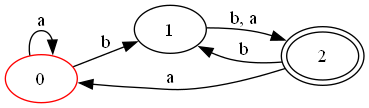

---


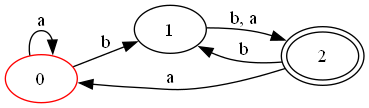

---


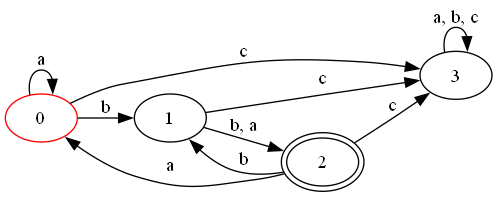

In [43]:
# On a défini auparavant un automate auto1, voilà les résultats le concernant :

auto1.show()
print('---')
assert auto1.estComplet({'a', 'b'}) == True
auto1complet = auto1.completeAutomate({'a', 'b'})
auto1complet.show()
assert auto1complet.estComplet({'a', 'b'}) == True

print('---')
assert auto1.estComplet({'a', 'b', 'c'}) == False
auto1complet = auto1.completeAutomate({'a', 'b', 'c'})
auto1complet.show()
assert auto1complet.estComplet({'a', 'b','c'}) == True

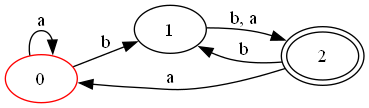

---


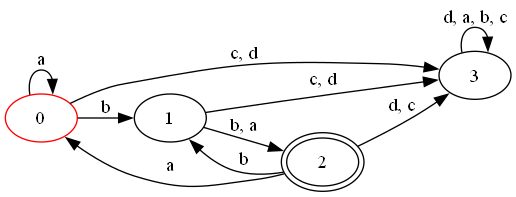

---


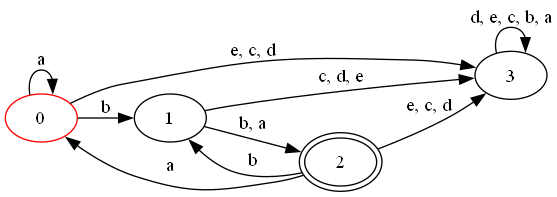

In [44]:
# Fournir un autre jeu de tests
auto1.show()
print('---')
assert auto1.estComplet({'a', 'b', 'c', 'd'}) == False
auto2complet = auto1.completeAutomate({'a', 'b', 'c', 'd'})
auto2complet.show()
assert auto2complet.estComplet({'a', 'b','c','d'}) == True
print('---')
assert auto1.estComplet({'a', 'b', 'c', 'd','e'}) == False
auto2complet = auto1.completeAutomate({'a', 'b', 'c', 'd','e'})
auto2complet.show()
assert auto2complet.estComplet({'a', 'b','c','d','e'}) == True

### 4. Déterminisation  <a class="anchor" id="sec4"></a>

1. Donner une définition de la fonction `newLabel`
qui, étant donné un ensemble d'états renvoie une chaine de caractères représentant l'ensemble de tous les labels des états.
Par exemple, l'appel de `newLabel` sur un ensemble de 3 états dont les labels sont `'1', '2', '3'` renvoie `'{1,2,3}'`

Afin d'être assuré que l'ordre de parcours de l'ensemble des états n'a pas d'importance, il sera nécessaire de trier par ordre alphabétique la liste des `label` des états. On pourra faire appel à `L.sort()` qui étant donné la liste `L` de cha^nes de caractères, la trie en ordre alphabétique.

In [45]:
# A faire par l'étudiant

def newLabel(S):
    """ set[State] -> str
    """
    labels = [state.label for state in S]
    labels.sort()
    return '{' + ','.join(labels) + '}'

In [46]:
# On a défini auparavant un automate auto1, voilà les résultats le concernant, puis un jeu de tests :

assert newLabel(auto1.allStates) == '{0,1,2}'

In [47]:
# Fournir un autre jeu de tests
assert newLabel(auto.allStates) == '{0,1,2}'

La fonction suivante permet de déterminiser un automate. On remarque qu'un état peut servir de clé dans un dictionnaire.

In [48]:
def determinisation(self) :
    """ Automate -> Automate
    rend l'automate déterminisé d'auto """
    # Ini : set[State]
    Ini = self.getSetInitialStates()
    # fin : bool
    fin = False
    # e : State
    for e in Ini:
        if e.fin:
            fin = True
    lab = newLabel(Ini)
    s = State(0, True, fin, lab)
    A = Automate(set())
    A.addState(s)
    Alphabet = {t.etiquette for t in self.allTransitions}
    Etats = dict()
    Etats[s] = Ini
    A.determinisation_etats(self, Alphabet, [s], 0, Etats, {lab})
    return A

Automate.determinisation = determinisation

L'automate déterminisé est construit dans `A`. Pour cela la fonction récursive `determinisation_etats` modifie en place l'automate `A`, et prend en outre les paramètres suivants :
- `auto`, qui est l'automate de départ à déterminiser
- `Alphabet` qui contient l'ensemble des lettres étiquetant les transistions de l'automate de départ
- `ListeEtatsATraiter` qui est la liste des états à ajouter et à traiter dans `A` au fur et à mesure que l'on progresse dans `auto`.
- `i` qui est l'indice de l'état en cours de traitement (dans la liste `ListeEtatsATraiter`).
- `Etats` qui est un dictionnaire dont les clés sont les états de `A` et les valeurs associées sont l'ensemble d'états issus de `auto` que cette clé représente.
- `DejaVus` est l'ensemble des labels d'états de `A` déjà vus.

In [49]:
# A faire par l'étudiant (on conserve la spécification de la fonction)

def determinisation_etats(self, auto, Alphabet, ListeEtatsATraiter, i, Etats, DejaVus):
    """ Automate x Automate x set[str] x list[State] x int x dict[State : set[State]], set[str] -> NoneType
    """
    # Si on a traité tous les états, on s'arrête
    if i >= len(ListeEtatsATraiter):
        return
    
    # Récupérer l'état courant à traiter
    etat_courant = ListeEtatsATraiter[i]
    # Récupérer l'ensemble d'états de l'automate original correspondant
    ensemble_etats = Etats[etat_courant]
    
    # Pour chaque lettre de l'alphabet
    for lettre in Alphabet:
        # Calculer l'ensemble des états successeurs
        successeurs = auto.succ(ensemble_etats, lettre)
        
        if successeurs:  # Si l'ensemble n'est pas vide
            # Créer le label pour le nouvel état
            nouveau_label = newLabel(successeurs)
            
            # Vérifier si cet état existe déjà
            etat_existant = None
            for etat in ListeEtatsATraiter:
                if etat.label == nouveau_label:
                    etat_existant = etat
                    break
            
            if etat_existant is None and nouveau_label not in DejaVus:
                # Créer un nouvel état
                # Déterminer si c'est un état final
                est_final = any(etat.fin for etat in successeurs)
                nouvel_etat = State(len(ListeEtatsATraiter), False, est_final, nouveau_label)
                
                # Ajouter le nouvel état à l'automate et aux structures
                self.addState(nouvel_etat)
                ListeEtatsATraiter.append(nouvel_etat)
                Etats[nouvel_etat] = successeurs
                DejaVus.add(nouvel_etat.label)
                
                # Créer la transition
                nouvelle_transition = Transition(etat_courant, lettre, nouvel_etat)
                self.addTransition(nouvelle_transition)
                
            else:
                # L'état existe déjà, créer la transition vers cet état
                if etat_existant is None:
                    # Trouver l'état existant par son label
                    for etat in ListeEtatsATraiter:
                        if etat.label == nouveau_label:
                            etat_existant = etat
                            break
                
                if etat_existant is not None:
                    nouvelle_transition = Transition(etat_courant, lettre, etat_existant)
                    self.addTransition(nouvelle_transition)
    
    # Appel récursif pour traiter le prochain état
    self.determinisation_etats(auto, Alphabet, ListeEtatsATraiter, i + 1, Etats, DejaVus)

    return 

Automate.determinisation_etats = determinisation_etats

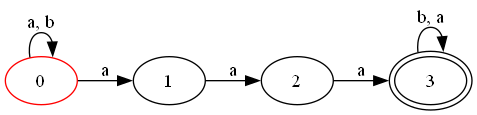

True


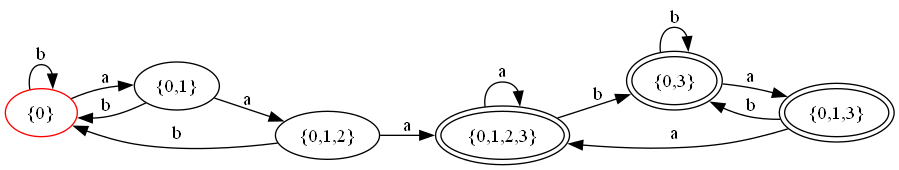

In [50]:
# Voici un test
#automate est l'automate construit plus haut a partir du fichier exempleAutomate.txt
automate.show()
auto_det = automate.determinisation()
print(auto_det.estDeterministe())
auto_det.show(2)

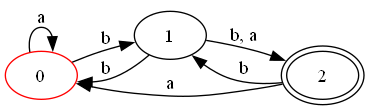

---
True


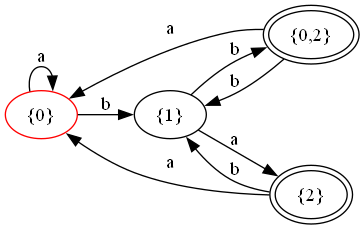

In [51]:
# Fournir un autre jeu de tests
auto1bis = copy.deepcopy(auto1)
t = Transition(s1, 'b', s0)
auto1bis.addTransition(t)
auto1bis.show()
print('---')
assert auto1bis.estDeterministe() == False
auto_det = auto1bis.determinisation()
print(auto_det.estDeterministe())
auto_det.show(2)

### 5. Constructions sur les automates réalisant  des opérations sur les langages acceptés <a class="anchor" id="sec5"></a>


#### 5.1 Opérations ensemblistes sur les langages <a class="anchor" id="sec5_1"></a>

1. Donner une définition de la fonction `complementaire` qui, étant donné un automate `auto` et un ensemble de caractères `Alphabet`, renvoie l'automate acceptant la langage complémentaire du langage accepté par `auto`. Ne pas modifier l'automate `auto`, mais construire un nouvel automate.

In [52]:
def complementaire(self, Alphabet):
    """ Automate x set[str] -> Automate
        rend  l'automate acceptant le complémentaire du langage de self
    """
    
    auto_det = self
    if not self.estDeterministe():
        auto_det = self.determinisation()
    
    auto_complet = auto_det.completeAutomate(Alphabet)
    
    nouveaux_etats = set()
    for etat in auto_complet.allStates:
        nouvel_etat = State(etat.id, etat.init, not etat.fin, etat.label)
        nouveaux_etats.add(nouvel_etat)
    
    nouvelles_transitions = set()
    
    mapping_etats = {}
    for etat_old, etat_new in zip(auto_complet.allStates, nouveaux_etats):
        mapping_etats[etat_old] = etat_new
    
    for transition in auto_complet.allTransitions:
        nouvelle_transition = Transition(
            mapping_etats[transition.stateSrc],
            transition.etiquette,
            mapping_etats[transition.stateDest]
        )
        nouvelles_transitions.add(nouvelle_transition)
    
    return Automate(nouvelles_transitions, nouveaux_etats, f"Complémentaire de {self.label}")
    

Automate.complementaire = complementaire

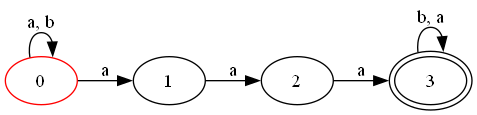

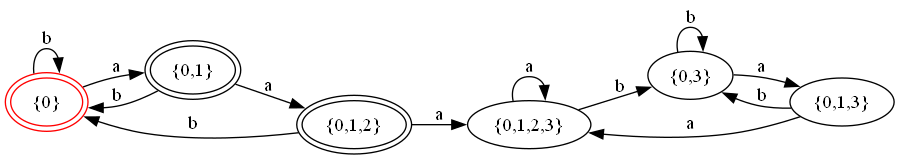

In [53]:
# Voici un test

automate = Automate.creationAutomate("ExemplesAutomates/exempleAutomate.txt")
automate.show()
Alphabet = {t.etiquette for t in auto.allTransitions}
auto_compl = automate.complementaire(Alphabet)
auto_compl.show(2)

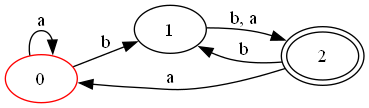

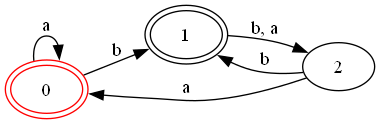

In [54]:
# Fournir un autre jeu de tests
automate = Automate.creationAutomate("ExemplesAutomates/auto2.txt")
automate.show()
Alphabet = {t.etiquette for t in auto.allTransitions}
auto_comp2 = automate.complementaire(Alphabet)
auto_comp2.show(2)

2. Donner une définition de la fonction `intersection` qui, étant donné deux automates `auto1` et `auto2`, renvoie l'automate acceptant l'intersection des langages acceptés par `auto1` et `auto2`.

L'automate construit ne doit pas avoir d'état non accessible depuis l'état initial.

In [55]:
# Visualisation du fonctionnement de itertools.product
L1 = [1, 2, 3]
L2 = ["a", "b", "c"]
L = set(itertools.product(L1, L2))
print(L)

{(3, 'a'), (3, 'b'), (2, 'c'), (1, 'a'), (1, 'b'), (3, 'c'), (1, 'c'), (2, 'a'), (2, 'b')}


In [56]:
#A faire par l'étudiant
def intersection(self, auto2):
    """ Automate x Automate -> Automate
    rend l'automate acceptant pour langage l'intersection des langages des deux automates
    """
    auto1 = self

    # Alphabet = intersection des alphabets
    alphabet = {t.etiquette for t in auto1.allTransitions} & \
               {t.etiquette for t in auto2.allTransitions}

    # ---- Création automate avec état factice ----
    intermediaire = State(0, False, False, "intermediaire")
    newAuto = Automate(set(), set(), "intersection")
    newAuto.addState(intermediaire)

    # Correspondance: (id1,id2) → State
    mapping = {}

    file = []

    # ---- États initiaux du produit ----
    for s1 in auto1.getSetInitialStates():
        for s2 in auto2.getSetInitialStates():
            key = (s1.id, s2.id)

            new_id = newAuto.nextId()
            new_state = State(new_id,
                              True,
                              s1.fin and s2.fin,  # DIFFÉRENCE: ET logique
                              f"{s1.label}_{s2.label}")

            newAuto.addState(new_state)
            mapping[key] = new_state
            file.append((s1, s2))

    # ---- BFS ----
    for (s1, s2) in file:
        pass  # nous ne voulons pas pop intermediaire, c'était juste pour nextId

    while file:
        s1, s2 = file.pop(0)
        ep = mapping[(s1.id, s2.id)]

        for a in alphabet:
            succ1 = auto1.succ({s1}, a)
            succ2 = auto2.succ({s2}, a)

            # Pour l'intersection : si un automate n'a pas de transition,
            # l'autre non plus, donc on continue
            if not succ1 or not succ2:
                continue

            for t1 in succ1:
                for t2 in succ2:
                    key = (t1.id, t2.id)

                    if key not in mapping:
                        new_id = newAuto.nextId()
                        new_state = State(new_id,
                                          False,
                                          t1.fin and t2.fin,  # DIFFÉRENCE: ET logique
                                          f"{t1.label}_{t2.label}")
                        newAuto.addState(new_state)
                        mapping[key] = new_state
                        file.append((t1, t2))

                    newAuto.addTransition(Transition(ep, a, mapping[key]))

    # ---- Retirer l'état factice ----
    newAuto.removeState(intermediaire)

    return newAuto
    
Automate.intersection = intersection  

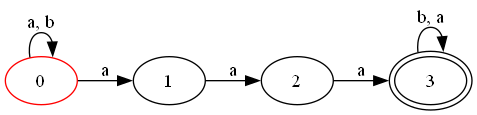

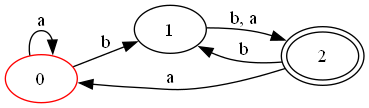

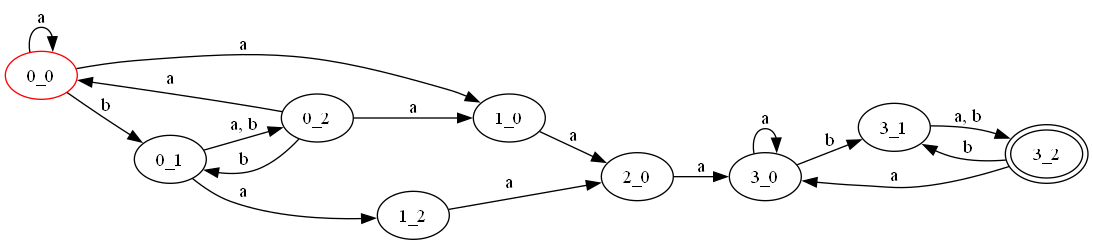

In [57]:
#Un premier test

auto1 = Automate.creationAutomate("ExemplesAutomates/exempleAutomate.txt")
auto1.show()
#auto2 = Automate.creationAutomate("ExemplesAutomates/exempleInter.txt")
# il faut avoir une variable auto2 contenant un automate
auto2.show()
inter = auto1.intersection(auto2)
inter.show(2)

In [58]:
# Fournir d'autres tests


3. (Question facultative) Donner une définition de la fonction `union` qui, étant donné deux automates `auto1` `auto2`, renvoie l'automate acceptant comme langage l'union des langages acceptés par `auto1` et `auto2`.

In [59]:
#À faire par l'étudiant

def union(self, auto2):
    """ Automate x Automate -> Automate
    rend l'automate acceptant pour langage l'union des langages des deux automates
    """
    auto1 = self

    # Alphabet = union des alphabets
    alphabet = {t.etiquette for t in auto1.allTransitions} | \
               {t.etiquette for t in auto2.allTransitions}

    # ---- Création automate avec état factice ----
    intermediaire = State(0, False, False, "interm")
    newAuto = Automate(set(), set(), "union")
    newAuto.addState(intermediaire)

    # Correspondance: (id1,id2) → State
    mapping = {}

    file = []

    # ---- États initiaux du produit ----
    for s1 in auto1.getSetInitialStates():
        for s2 in auto2.getSetInitialStates():

            key = (s1.id, s2.id)

            new_id = newAuto.nextId()
            new_state = State(new_id,
                              True,
                              s1.fin or s2.fin,
                              f"{s1.label}_{s2.label}")

            newAuto.addState(new_state)
            mapping[key] = new_state
            file.append((s1, s2))

    # ---- BFS ----
    for (s1, s2) in file:
        pass  # nous ne voulons pas pop dummy, c’était juste pour nextId

    while file:
        s1, s2 = file.pop(0)
        ep = mapping[(s1.id, s2.id)]

        for a in alphabet:

            succ1 = auto1.succ({s1}, a)
            succ2 = auto2.succ({s2}, a)

            # Pour l’union : si aucune transition → aucun successeur
            if not succ1:
                continue
            if not succ2:
                continue

            for t1 in succ1:
                for t2 in succ2:

                    key = (t1.id, t2.id)

                    if key not in mapping:
                        new_id = newAuto.nextId()
                        new_state = State(new_id,
                                          False,
                                          t1.fin or t2.fin,
                                          f"{t1.label}_{t2.label}")
                        newAuto.addState(new_state)
                        mapping[key] = new_state
                        file.append((t1, t2))

                    newAuto.addTransition(Transition(ep, a, mapping[key]))

    # ---- Retirer l’état factice ----
    newAuto.removeState(intermediaire)

    return newAuto

Automate.union = union  

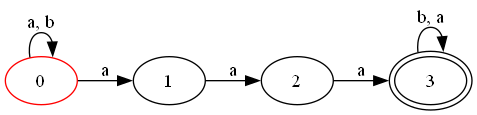

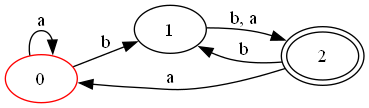

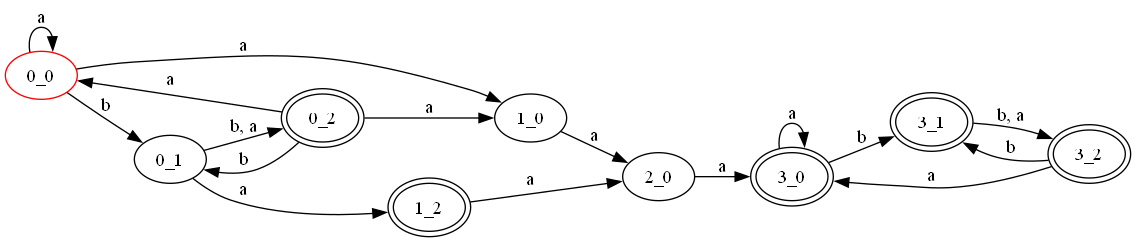

In [60]:
#Un premier test

auto1.show()
auto2.show()
uni = auto1.union(auto2)
uni.show(2)

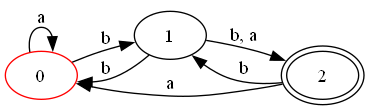

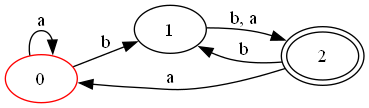

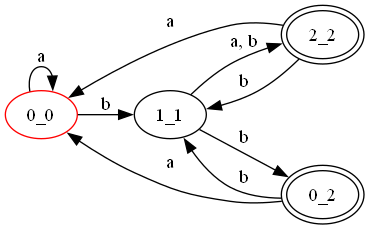

In [61]:
#Fournir d'autres tests
auto1bis.show()
auto2.show()
uni = auto1bis.union(auto2)
uni.show(2)

#### 5.2 Opérations rationnelles sur les langages <a class="anchor" id="sec5_2"></a>

Programmer *une des deux* méthodes suivantes:

1. Donner une définition de la fonction `concatenation` qui, étant donné deux automates `auto1` et `auto2`, renvoie l'automate acceptant comme langage la concaténation des langages acceptés par `auto1` et `auto2`.

2. Donner une définition de la fonction `etoile` qui, étant donné un automate `auto`, renvoie l'automate acceptant comme langage l'étoile du langages accepté par `auto`.

In [62]:
# A faire par l'etudiant

def concatenation (self, auto):
    """ Automate x Automate -> Automate
    rend l'automate acceptant pour langage la concaténation des langages des deux automates
    """
    #Copie des deux automates pour ne rien modifier
    A = copy.deepcopy(self)
    B = copy.deepcopy(auto)
    prefixe = A.nextId()
    B.prefixStates(prefixe)
    newAuto = Automate(set(), set(), "")    # Construction nouvel automate contenant les deux automates
    
    for s in A.allStates:   # Ajout états et transitions de A
        newAuto.addState(s)
    for t in A.allTransitions:
        newAuto.addTransition(t)
        
    for s in B.allStates:   # Ajout états et transitions de B
        newAuto.addState(s)
    for t in B.allTransitions:
        newAuto.addTransition(t)
        
    finalsA = A.getSetFinalStates()
    initialsB = B.getSetInitialStates()
    finalsB = B.getSetFinalStates()
    
    for sf in finalsA:
        sf.fin = False

        # Pour chaque transition issue des états initiaux de B
        for si in initialsB:
            for t in B.getSetTransitionsFrom(si):
                # Ajouter la même transition en partant de sf
                newAuto.addTransition(Transition(sf, t.etiquette, t.stateDest))

        # Si un état initial de B est final → sf devient final
        for si in initialsB:
            if si.fin:
                sf.fin = True

    # États finaux du résultat = états finaux de B
    for sf in finalsB:
        sf.fin = True

    return newAuto
    
Automate.concatenation = concatenation

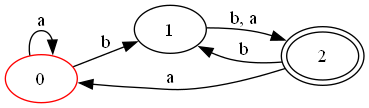

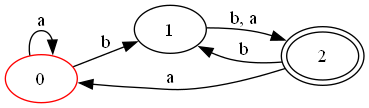

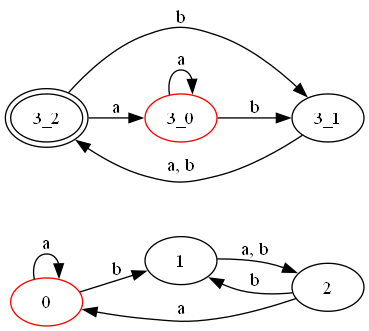

In [63]:
#Un premier test

automate.show()
auto2.show()
concat = automate.concatenation(auto2)
concat.show(2)

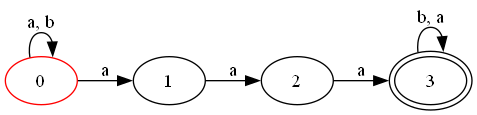

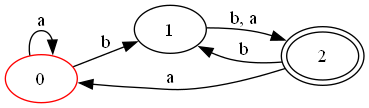

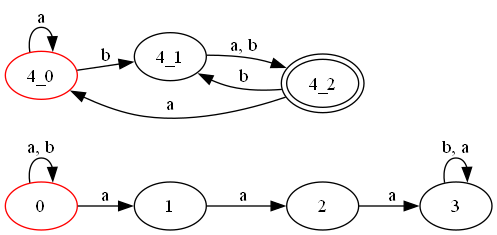

In [64]:
#Fournir d'autres tests
auto1.show()
auto2.show()
concat = auto1.concatenation(auto2)
concat.show(2)

In [65]:
def etoile (self):
    """ Automate  -> Automate
    rend l'automate acceptant pour langage l'étoile du langage de l'automate appelant
    """
    A = copy.deepcopy(self)    #Copie automate d'origine
    
    new_id = A.nextId()    #Création nouvel état initial-final
    newInit = State(new_id, init=True, fin=True, label=f"init_{new_id}")

    # Créer l’automate résultat
    newAuto = Automate(set(), set(), "")
    
    for s in A.allStates:        # Ajout états et transitions de A
        newAuto.addState(s)
    for t in A.allTransitions:
        newAuto.addTransition(t)
        
    newAuto.addState(newInit)    # Ajout du nouvel état initial-final
    initialA = A.getSetInitialStates()
    for s in initialA:
        s.init = False
    for si in initialA:
        for t in A.getSetTransitionsFrom(si):
            newAuto.addTransition(Transition(newInit, t.etiquette, t.stateDest))
    finalsA = A.getSetFinalStates()

    for sf in finalsA:
        sf.fin = True 
        for si in initialA:
            for t in A.getSetTransitionsFrom(si):
                newAuto.addTransition(Transition(sf, t.etiquette, t.stateDest))

    return newAuto

Automate.etoile = etoile

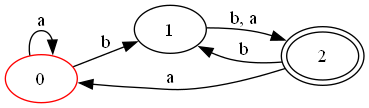

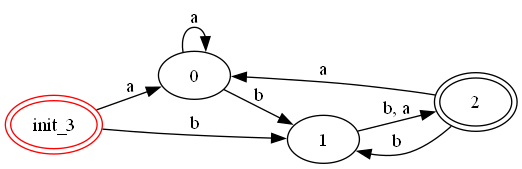

In [66]:
#Un premier test

automate.show()
autoetoile = automate.etoile()
autoetoile.show()

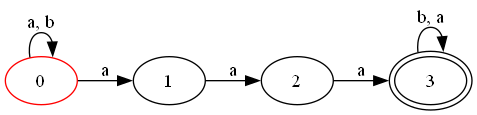

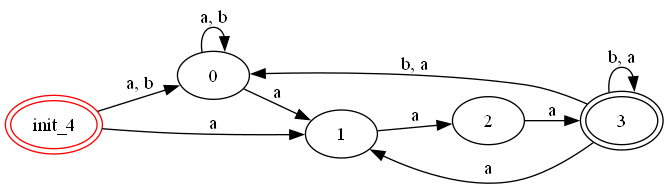

In [67]:
#Fournir d'autres tests
auto1.show()
autoetoile2 = auto1.etoile()
autoetoile2.show()

#### 6 Application <a class="anchor" id="sec6"></a>

Cette partie du projet consiste à mettre en pratique l'utilisation d'un automate afin de rechercher des mots dans un texte.
La fonction suivante `alphabet_fichier`, étant donné un fichier textuel, renvoie l'ensemble des lettres présentes dans le texte du fichier.

In [68]:
def alphabet_fichier(nom):
    """ Fichier -> set[str]
    renvoie l'ensemble des lettres apparaissant dans le texte du fichier. 
    Chaque chaine de l'ensemble construit est de taille 1."""
    # A : set[str]
    A = set()
    with open(nom) as fichier:
        # ligne : str
        for ligne in fichier:
            # c : str de taille 1
            for c in ligne:
                A.add(c)
    return A

In [69]:
alphabet = alphabet_fichier("ExemplesAutomates/Extrait_Nicolas_Appert.txt")
print(alphabet)

{'x', '.', '-', 'E', 'O', 'g', 't', 'u', "'", 'd', 'j', 'b', '5', 'e', 'v', 'p', '\xa0', '¨', '0', 'y', 'n', 'r', '3', ',', 'h', '2', '\n', 'Ã', 'a', 'o', '§', 'S', ':', 'l', ';', '4', '»', ' ', 'm', 'f', '1', 'L', 's', '6', 'D', '©', 'i', 'ª', 'c', 'q'}


Notre but consiste à extraire tous les nombres décimaux apparaissant dans un texte. Un nombre décimal vérifie la spécification suivante :
- ses premiers caractères sont des chiffres entre 0 et 9;
- le séparateur `,` apparait entre la partie entière et la partie décimale du nombre;
- ses derniers caractères sont des chiffres de 0 à 9.
Comme ces nombres apparaissent dans des chaîne de caractères, ils sont du type `str` dans notre contexte.

Ainsi `'012,4'`et `'0,12345'`sont des nombres décimaux, par contre `',123'`, `'123'` ou `'123.456'` n'en sont pas.

Donner une définition de la fonction `auto_flottant` qui, étant donné un ensemble de lettres `Alphabet`, renvoie l'automate acceptant comme langage l'ensemble des nombres décimaux.

Remarque :
- il faut que les nombres, sous forme de chaines de caractères extraites, représentent des nombres décimaux complets, c'est-à-dire qu'ils contiennent tous les chiffres consécutifs du texte. Par exemple, si le texte est 
`'abc123,4560def'` le seul nombre qui est extrait est `'123,4560'`;
- si le nombre décimal termine une ligne, il y a un cas particulier à gérer.

In [70]:
# C'est une fonction, pas une méthode

def auto_flottant(Alphabet):
    """set[str] -> Automate
        prend en entrée en ensemble de chaines de caractères (chacune de taille 1),
        et renvoie l'automate acceptant les nombres décimaux."""
    
    q0 = State(0, init=True, fin=False, label="start")         # Création différents États
    q1 = State(1, init=False, fin=False, label="int")
    q2 = State(2, init=False, fin=False, label="comma")
    q3 = State(3, init=False, fin=True,  label="frac")

    auto = Automate(set(), set(), "auto_flottant")       # Création Automate vide
    
    for s in [q0, q1, q2, q3]:    # Ajout des états
        auto.addState(s)

    # Définition des transitions
    # tous les chiffres dans Alphabet :
    digits = {c for c in Alphabet if c.isdigit()}

    # q0 → q1 par un chiffre
    for d in digits:
        auto.addTransition(Transition(q0, d, q1))

    # q1 → q1 sur chiffre
    for d in digits:
        auto.addTransition(Transition(q1, d, q1))

    # q1 → q2 sur virgule
    if ',' in Alphabet:
        auto.addTransition(Transition(q1, ',', q2))

    # q2 → q3 sur chiffre
    for d in digits:
        auto.addTransition(Transition(q2, d, q3))

    # q3 → q3 sur chiffre
    for d in digits:
        auto.addTransition(Transition(q3, d, q3))
    return auto

{'x', '.', '-', 'E', 'O', 'g', 't', 'u', "'", 'd', 'j', 'b', '5', 'e', 'v', 'p', '\xa0', '¨', '0', 'y', 'n', 'r', '3', ',', 'h', '2', '\n', 'Ã', 'a', 'o', '§', 'S', ':', 'l', ';', '4', '»', ' ', 'm', 'f', '1', 'L', 's', '6', 'D', '©', 'i', 'ª', 'c', 'q'}


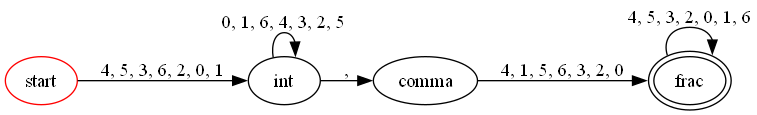

In [71]:
# Jeu de test
alphabet = alphabet_fichier("ExemplesAutomates/Extrait_Nicolas_Appert.txt")
print(alphabet)
alphabet.add(' ')  ## permet de terminer les lignes par un espace (si jamais)
auto = auto_flottant(alphabet)
auto.show(300)

Donner une définition de la fonction `liste_flottants` prenant en entrée un automate ainsi qu'un fichier textuel et renvoyant la liste des nombres flottants présents dans le texte.

In [72]:
def liste_flottants(auto, nom):
    """ Automate x Fichier -> list[str]
        renvoie la liste des nombres décimaux, sous forme de chaines de caractères, apparaissant
        dans l'ordre de lecture dans le fichier.
    """

    resultat = []

    # On récupère l'ensemble des états initiaux (normalement un seul)
    initiaux = auto.getSetInitialStates()

    with open(nom, "r", encoding="utf-8") as f:
        for ligne in f:
            ligne = ligne.rstrip("\n")
            n = len(ligne)
            i = 0

            # On parcourt la ligne caractère par caractère
            while i < n:
                etats_courants = initiaux
                mot_courant = ""

                dernier_mot_valide = None
                dernier_j = i

                j = i

                # On essaie de lire un nombre décimal à partir de i
                while j < n:
                    c = ligne[j]

                    # Ensemble des états atteignables avec ce caractère
                    etats_suivants = auto.succ(etats_courants, c)

                    if not etats_suivants:
                        break  # plus de transition possible → on s'arrête ici

                    mot_courant += c
                    etats_courants = etats_suivants

                    # Si au moins un état est final → mot valide pour l'instant
                    if any(s.fin for s in etats_courants):
                        dernier_mot_valide = mot_courant
                        dernier_j = j

                    j += 1

                # Si on a détecté un mot valide (atteint un état final)
                if dernier_mot_valide is not None:
                    resultat.append(dernier_mot_valide)
                    i = dernier_j + 1  # on avance après le flottant trouvé
                else:
                    i += 1  # sinon on avance d'un caractère

    return resultat


In [73]:
# Jeu de test
liste_flottants(auto, "ExemplesAutomates/Extrait_Nicolas_Appert.txt") == ['1,020', '26,500', '3,600', '1,200', '2,040']

True